In [1]:
import pandas as pd
import numpy as numpy 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 

In [2]:
df= pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.shape

(569, 32)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

The total entries are 569 entries with 32 columns. There is no missing value.
* diagnosis datatype 'object' needs to converted into int
* Assign B: benign to 0 and M:malignant to 1

#EDA

Text(0.5, 1.0, 'Breast Cancer unbalanced data')

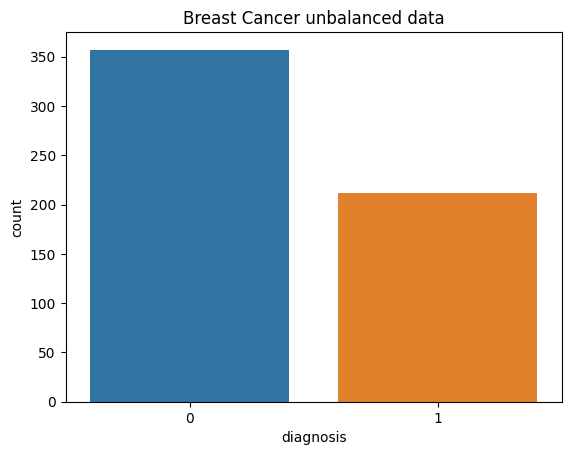

In [29]:
sns.countplot(data=df, x='diagnosis')
plt.title("Breast Cancer unbalanced data")

In [7]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.drop(columns='id', inplace=True)

In [9]:
df.shape

(569, 31)

In [10]:
df['diagnosis']= df['diagnosis'].map({'M':1, 'B':0}).astype(int)

In [11]:
df['diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

<Axes: >

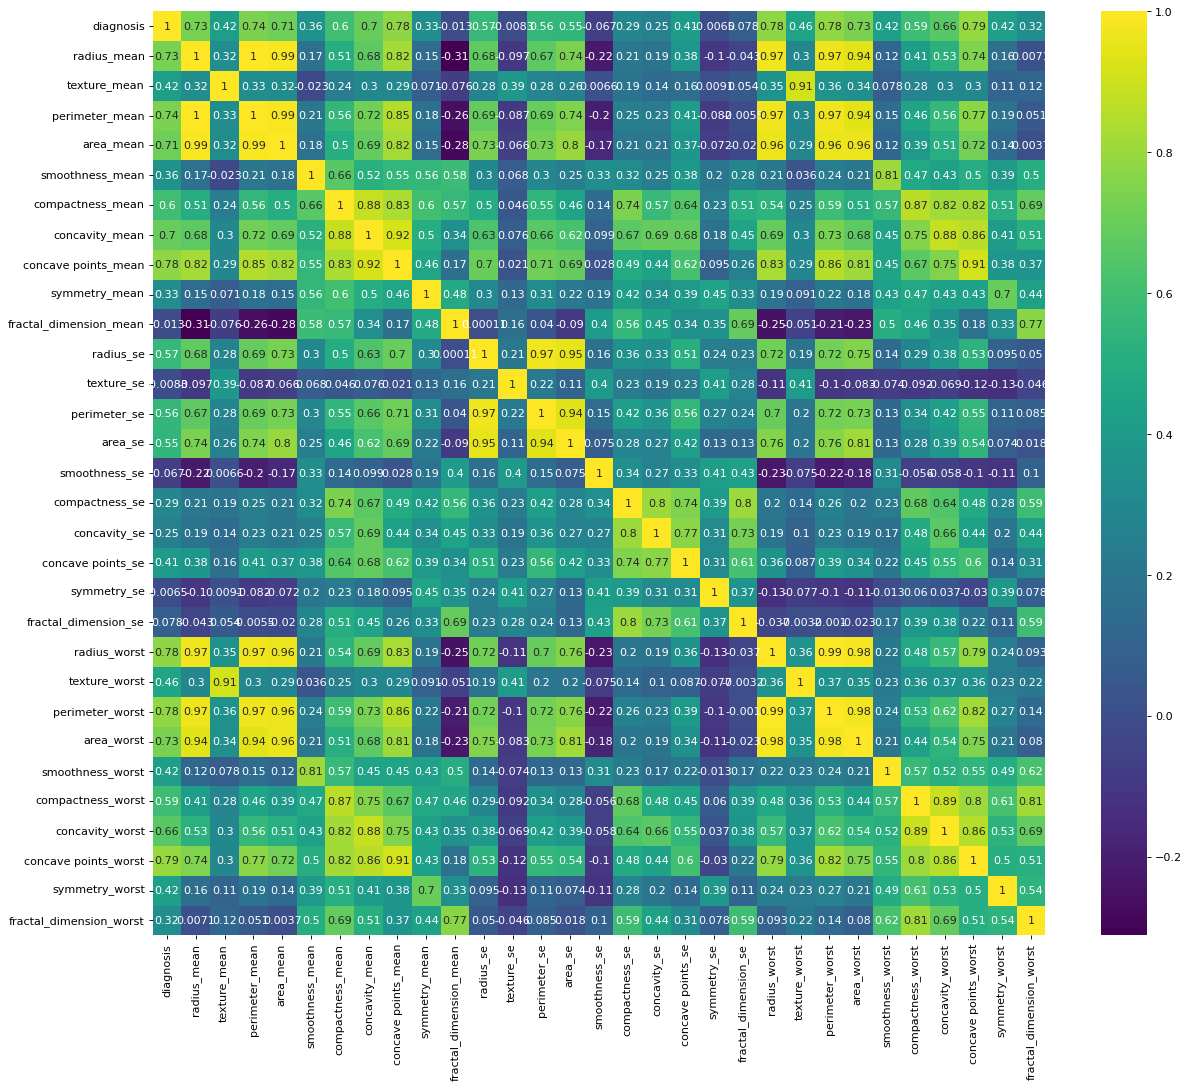

In [12]:
### Check correlation
plt.figure(figsize=(18, 15), dpi=80)
sns.heatmap(df.corr(), annot=True, cmap='viridis')

<Axes: >

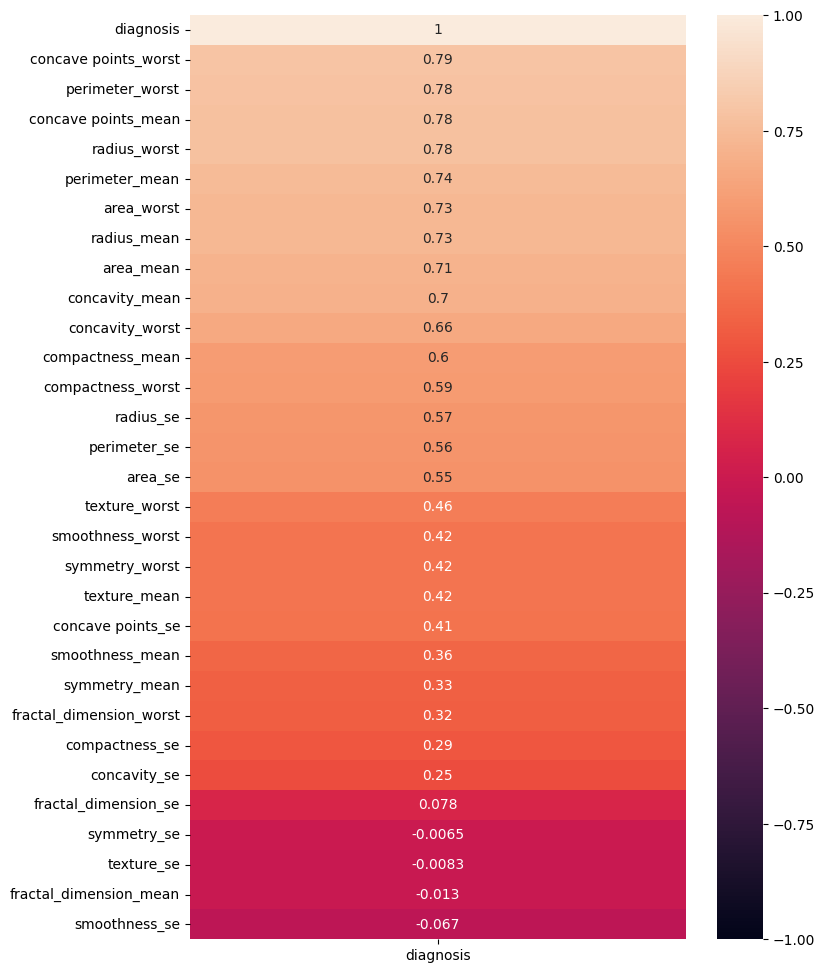

In [13]:
plt.figure(figsize=(8, 12))
sns.heatmap(df.corr()[['diagnosis']].sort_values(by='diagnosis', ascending=False), vmin=-1, annot=True)

In [14]:
# import ipywidgets as widgets
# from IPython.display import display

# from ydata_profiling import ProfileReport
# prof = ProfileReport(df)
# prof.to_notebook_iframe()

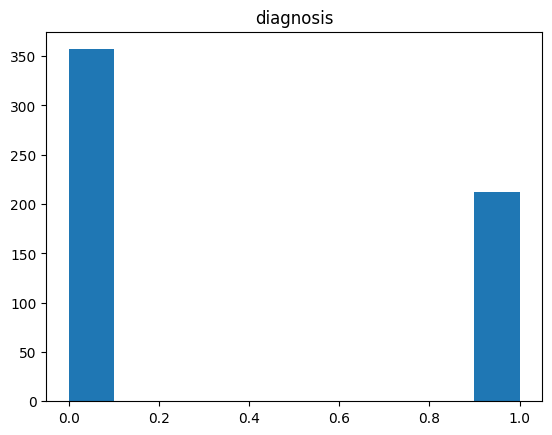

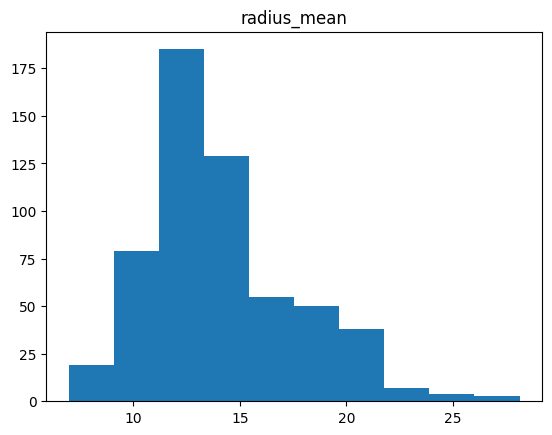

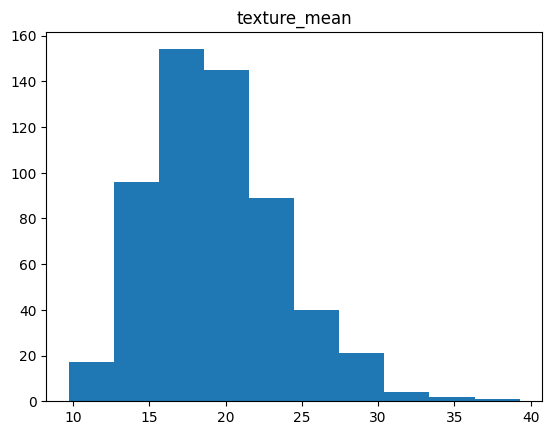

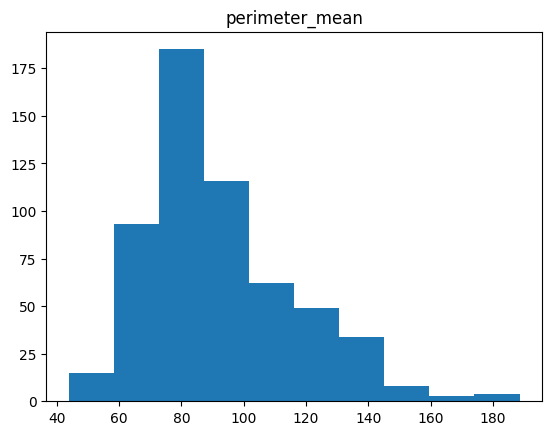

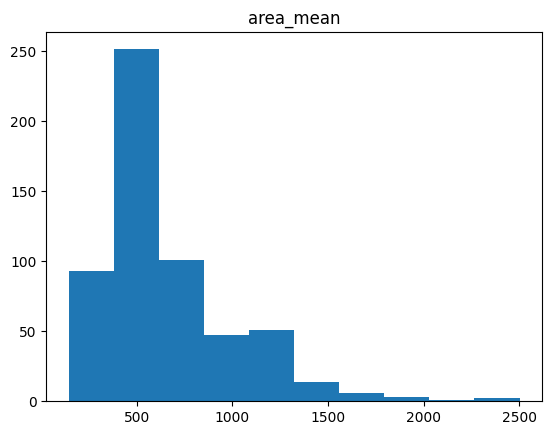

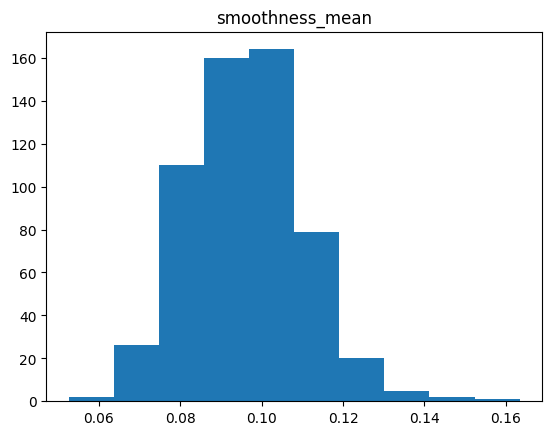

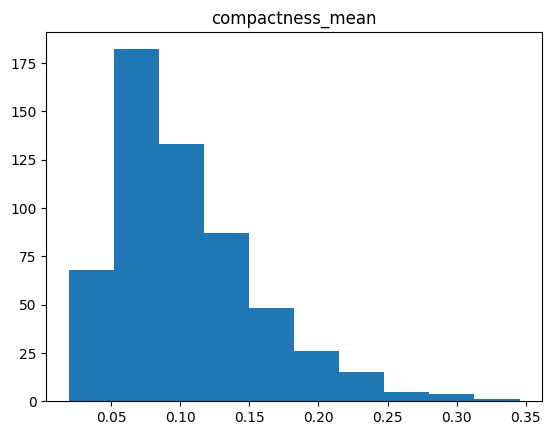

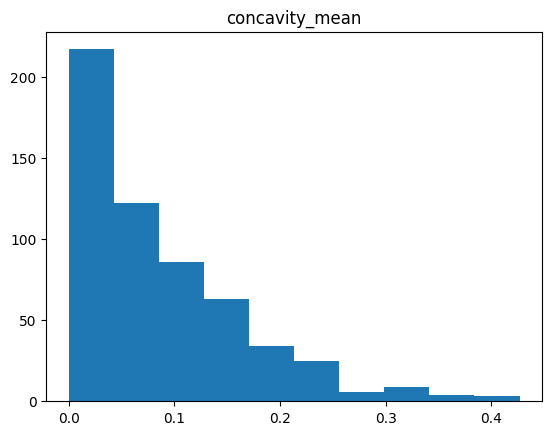

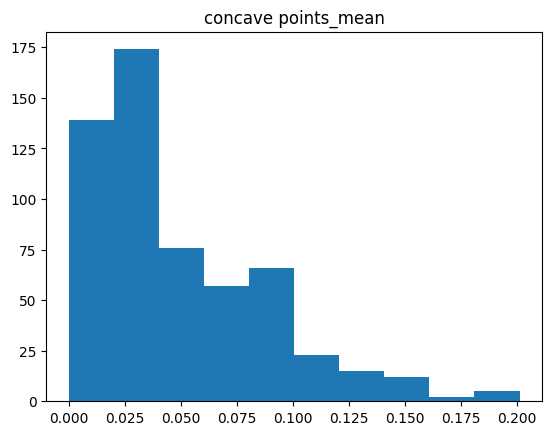

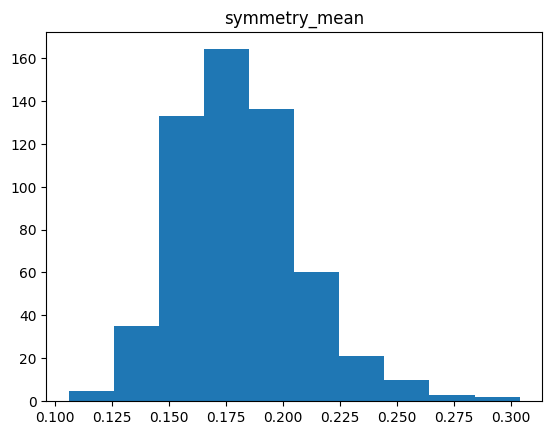

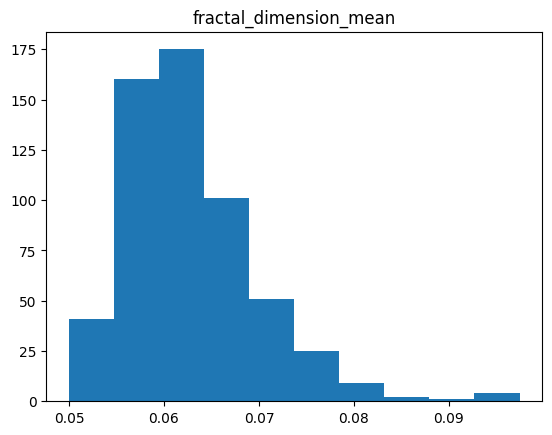

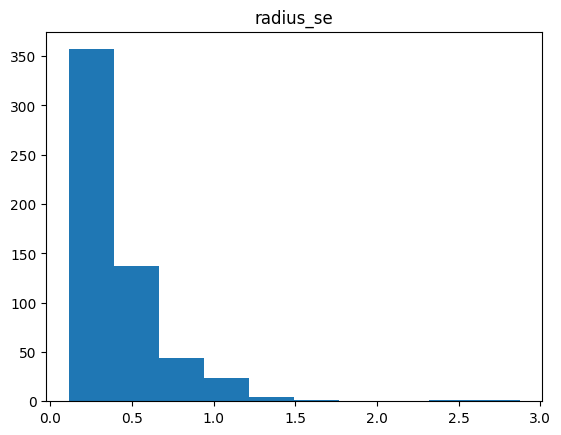

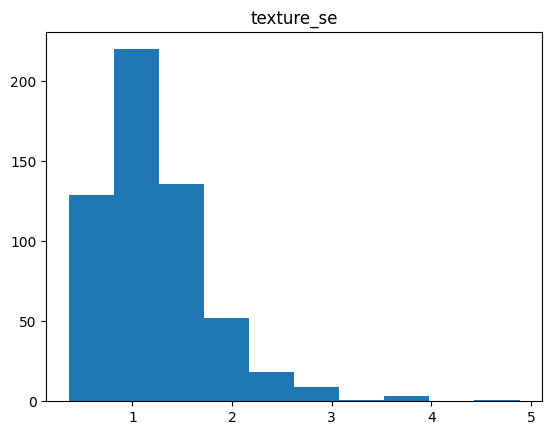

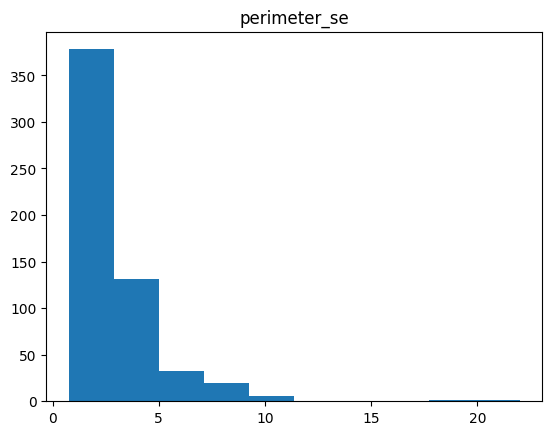

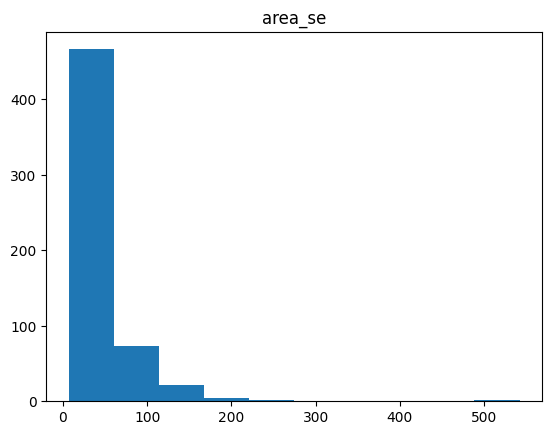

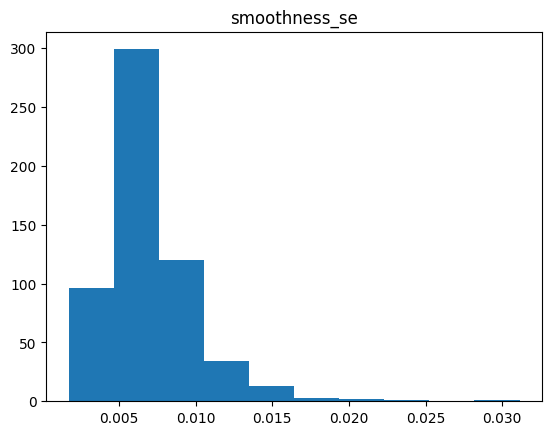

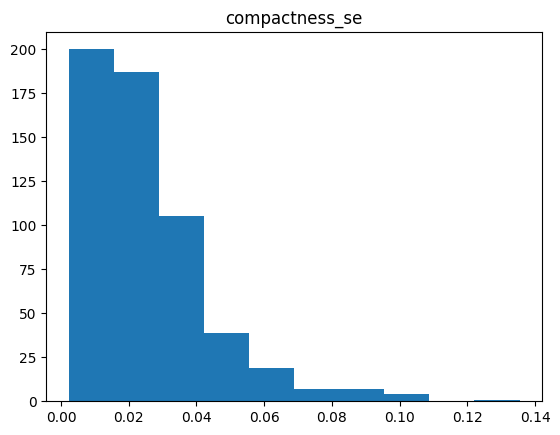

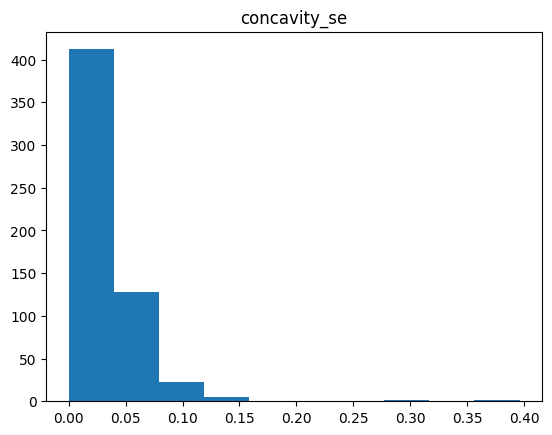

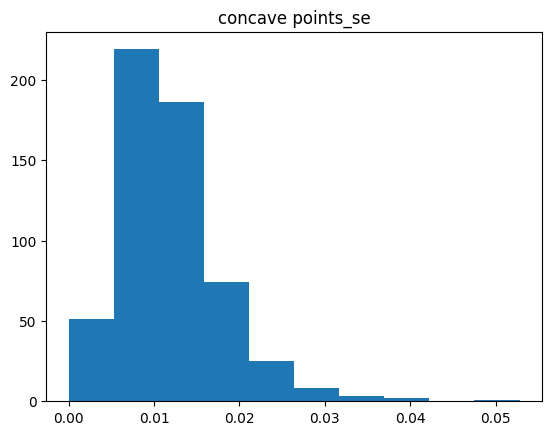

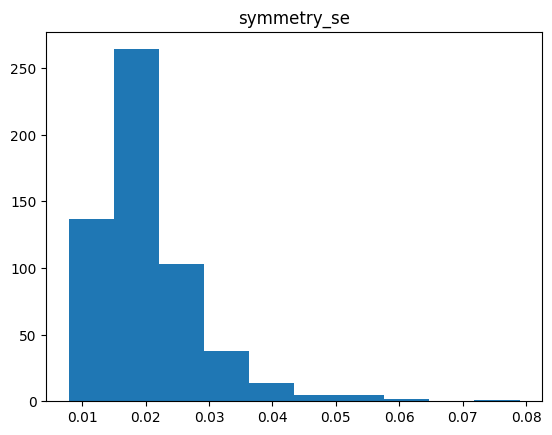

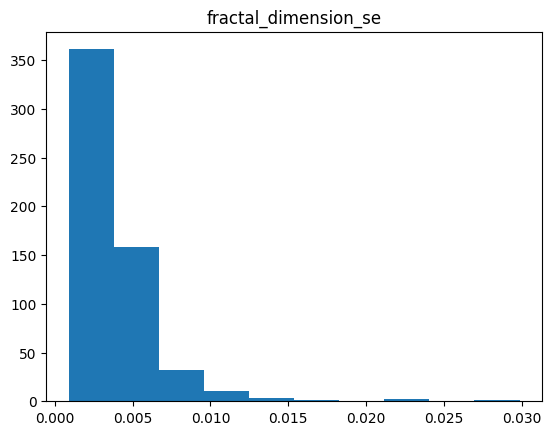

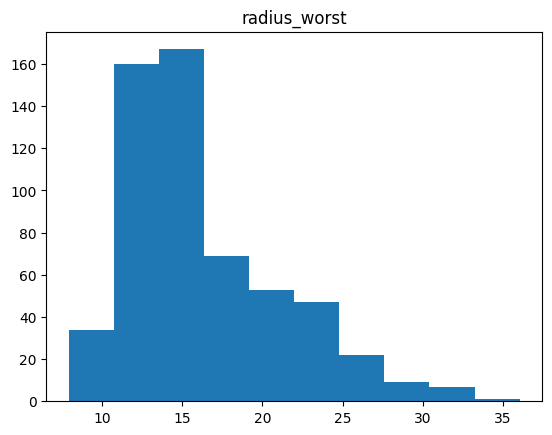

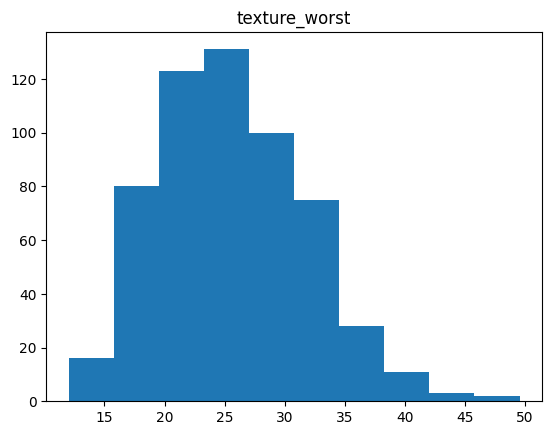

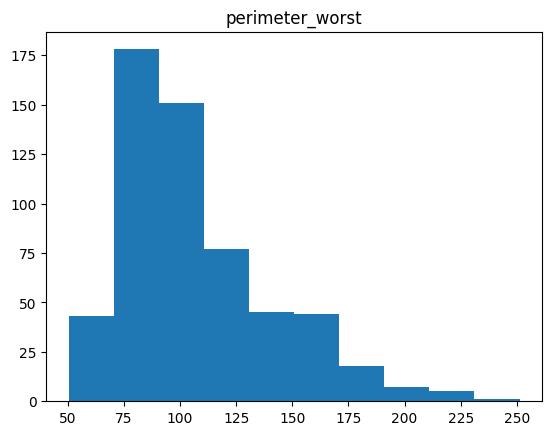

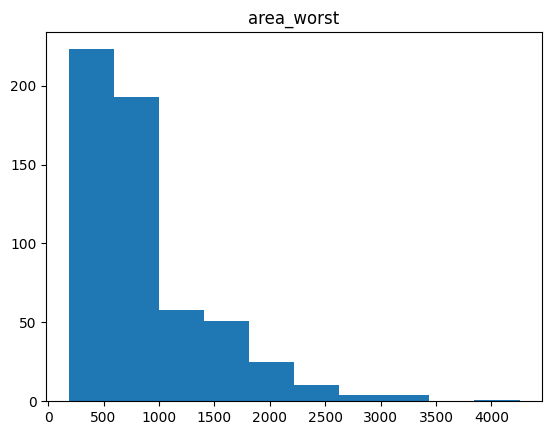

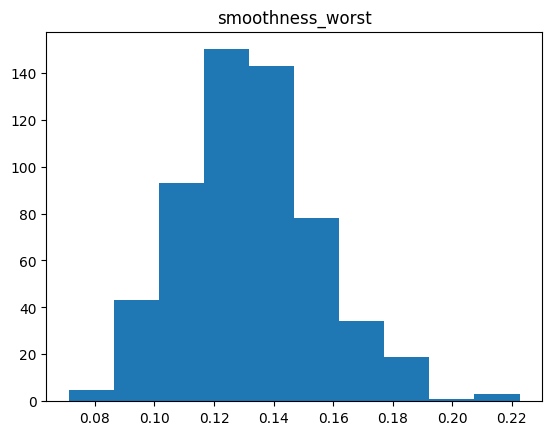

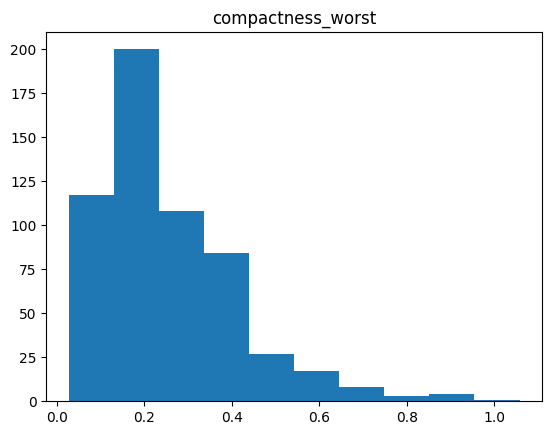

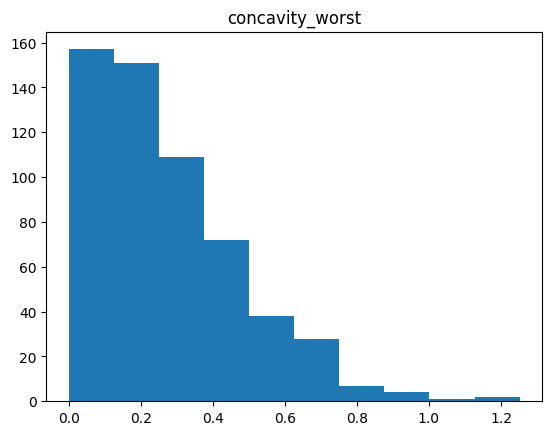

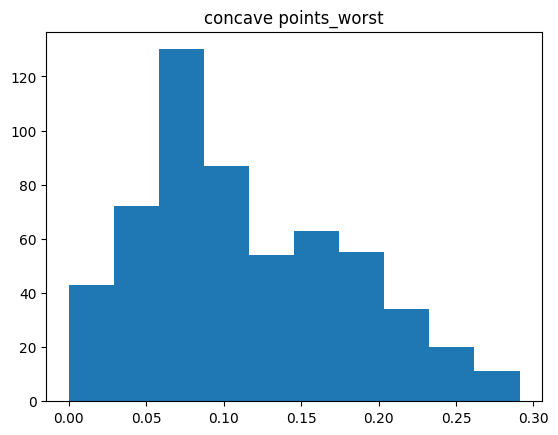

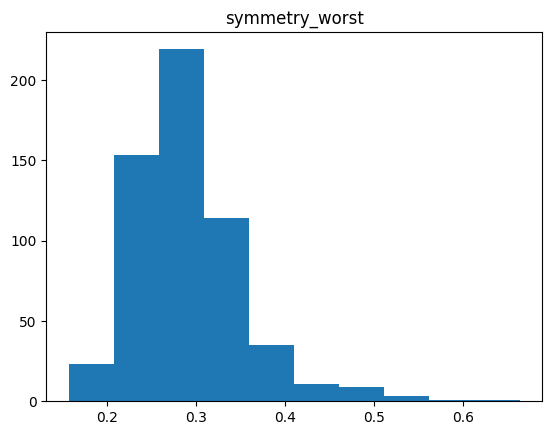

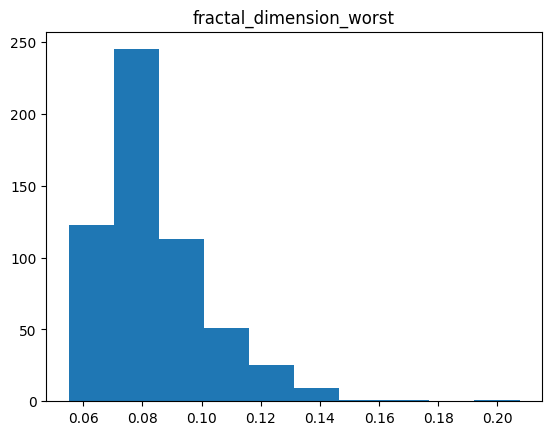

In [15]:
# plt.figure(figsize=(10,8))
for col in df.columns:
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [16]:
# lets check for skew in our data
skew= df.skew().sort_values(ascending=False)
print("Raw Skew Values: ", skew)

Raw Skew Values:  area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
symmetry_mean              0.725609
texture_mean               0.650450
diagnosis                  0.528461
texture_wo

we will log transform features that have a skew > 0.5

In [17]:
skew['diagnosis']

0.5284613207977967

In [18]:
#we will log transform features that have a skew > 0.5
skew_threshold=0.5
skewed_features= skew[(skew > skew_threshold)].index
skewed_features=skewed_features.drop(['diagnosis'])
print("Skewed features:\n", skewed_features)

Skewed features:
 Index(['area_se', 'concavity_se', 'fractal_dimension_se', 'perimeter_se',
       'radius_se', 'smoothness_se', 'symmetry_se', 'compactness_se',
       'area_worst', 'fractal_dimension_worst', 'texture_se', 'area_mean',
       'compactness_worst', 'concave points_se', 'symmetry_worst',
       'concavity_mean', 'fractal_dimension_mean', 'compactness_mean',
       'concave points_mean', 'concavity_worst', 'perimeter_worst',
       'radius_worst', 'perimeter_mean', 'radius_mean', 'symmetry_mean',
       'texture_mean'],
      dtype='object')


In [19]:
skewed_features.shape

(26,)

Lets apply a boxcox transformation to our skewed features
The Box Cox Transformation is a popular method of transforming non-normal dependent variables into a normal shape. 
* Make the skew between 0.5 and -0.5!

In [20]:
from scipy.stats import boxcox
df_clean= df.copy()
epsilon = 1e-8  # A small positive constant
df_clean[skewed_features]= df_clean[skewed_features].apply(lambda x: boxcox(x+ epsilon)[0])
df_clean[skewed_features]

,area_se,concavity_se,fractal_dimension_se,perimeter_se,radius_se,smoothness_se,symmetry_se,compactness_se,area_worst,fractal_dimension_worst,...,fractal_dimension_mean,compactness_mean,concave points_mean,concavity_worst,perimeter_worst,radius_worst,perimeter_mean,radius_mean,symmetry_mean,texture_mean
0,2.039167,-1.785665,-12.298759,1.403908,0.089136,-11.736030,-13.429842,-3.005401,2.774886,-12.285265,...,-210.987284,-1.259793,-1.364333,-0.318054,1.493682,1.286458,1.925223,1.593155,-1.791180,2.399808
1,1.943563,-2.082679,-15.234487,0.951522,-0.689996,-12.673692,-23.140417,-4.316585,2.772329,-18.483554,...,-473.963197,-2.458076,-1.677674,-1.087850,1.488265,1.284814,1.933568,1.627250,-2.265059,2.968494
2,1.978278,-1.893234,-13.823225,1.117787,-0.311388,-11.915220,-16.511642,-3.206313,2.761131,-18.909828,...,-411.961446,-1.788857,-1.430434,-0.684460,1.486716,1.278443,1.931270,1.616358,-2.042137,3.159134
3,1.751290,-1.767814,-10.510767,0.959622,-0.809754,-10.231039,-8.054531,-2.588677,2.648295,-7.125381,...,-124.621159,-1.238104,-1.517124,-0.349104,1.467329,1.218517,1.870192,1.460445,-1.681202,3.114508
4,1.978878,-1.766170,-13.242074,1.203341,-0.294091,-9.324749,-19.659580,-3.689939,2.754110,-22.714411,...,-432.254863,-1.965209,-1.520792,-0.769137,1.486640,1.273400,1.935264,1.623859,-2.267903,2.740858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.042930,-1.796808,-14.224367,1.358017,0.157004,-9.743875,-26.936253,-3.530150,2.775204,-25.243706,...,-483.147863,-2.093914,-1.391864,-0.750642,1.489938,1.286748,1.940329,1.638716,-2.349154,3.214976
565,1.985368,-1.884122,-17.315463,1.181787,-0.281941,-12.208440,-18.617109,-3.705377,2.762213,-27.791025,...,-502.729635,-2.201461,-1.547415,-0.915039,1.487343,1.279007,1.932230,1.621891,-2.323158,3.464166
566,1.872456,-1.827819,-14.690104,0.956195,-0.920490,-12.102520,-23.994547,-3.276936,2.723003,-22.143461,...,-477.898937,-2.211523,-1.775262,-0.878286,1.479084,1.252467,1.911311,1.571659,-2.494063,3.457681
567,1.966070,-1.685357,-12.304950,1.231782,-0.341485,-11.650818,-16.136798,-2.779111,2.766459,-11.569894,...,-280.110666,-1.261883,-1.348336,-0.062478,1.493682,1.287937,1.938971,1.627609,-1.805511,3.504498


In [21]:
df_skewed=df_clean.skew().sort_values(ascending=False) #print normalized features
df_skewed

diagnosis                  0.528461
texture_worst              0.498321
concave points_worst       0.492616
smoothness_mean            0.456324
smoothness_worst           0.415426
area_se                    0.058529
concavity_se               0.041383
perimeter_se               0.031614
perimeter_worst            0.030437
radius_se                  0.030343
radius_worst               0.029595
area_worst                 0.026589
fractal_dimension_worst    0.024883
fractal_dimension_mean     0.013525
symmetry_se                0.008194
perimeter_mean             0.006916
radius_mean                0.006255
area_mean                  0.005090
compactness_se            -0.000043
texture_mean              -0.000115
texture_se                -0.000137
fractal_dimension_se      -0.000444
compactness_mean          -0.001664
compactness_worst         -0.005668
symmetry_mean             -0.007120
smoothness_se             -0.020178
symmetry_worst            -0.031618
concave points_se         -0

All skew are now between -0.5 and 0.5

In [22]:
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,1.593155,2.399808,1.925223,3.635520,0.11840,-1.259793,-0.986933,-1.364333,-1.791180,...,1.286458,17.33,1.493682,2.774886,0.1622,-0.396541,-0.318054,0.2654,-0.937627,-12.285265
1,1,1.627250,2.968494,1.933568,3.699029,0.08474,-2.458076,-1.656816,-1.677674,-2.265059,...,1.284814,23.41,1.488265,2.772329,0.1238,-1.509116,-1.087850,0.1860,-1.778024,-18.483554
2,1,1.616358,3.159134,1.931270,3.677465,0.10960,-1.788857,-1.245680,-1.430434,-2.042137,...,1.278443,25.53,1.486716,2.761131,0.1444,-0.811094,-0.684460,0.2430,-1.307019,-18.909828
3,1,1.460445,3.114508,1.870192,3.390034,0.14250,-1.238104,-1.125997,-1.517124,-1.681202,...,1.218517,26.50,1.467329,2.648295,0.2098,-0.142201,-0.349104,0.2575,-0.452086,-7.125381
4,1,1.623859,2.740858,1.935264,3.694169,0.10030,-1.965209,-1.243935,-1.520792,-2.267903,...,1.273400,16.67,1.486640,2.754110,0.1374,-1.432958,-0.769137,0.1625,-2.066370,-22.714411


In [23]:
# separate X and y 
y= df_clean['diagnosis']
X=df_clean.drop(['diagnosis'], axis=1)

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32

In [25]:
### Split data
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

Apply Smote Oversampling technique to balance the dataset

In [27]:
from imblearn.over_sampling import SMOTE

over_sample= SMOTE(random_state=42)
X_smote, y_smote= over_sample.fit_resample(X_train, y_train)
X_train, y_train= X_smote, y_smote
y_train.value_counts()

0    286
1    286
Name: diagnosis, dtype: int64

Text(0.5, 1.0, 'Breast cancer balance data after Smote')

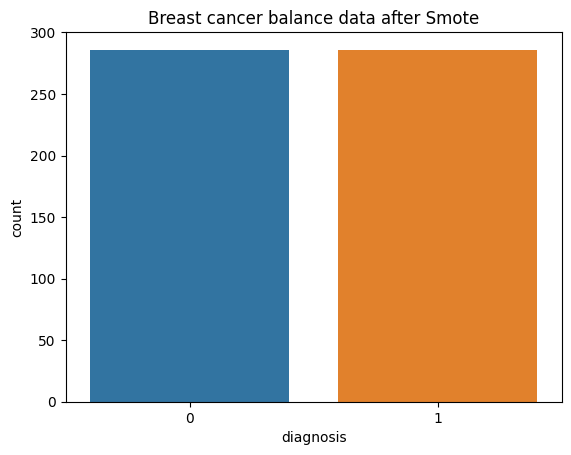

In [28]:
sns.countplot(data=df, x=y_train)
plt.title("Breast cancer balance data after Smote")

In [28]:
## Feature Normalization
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [29]:
# Machine Learning Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
# from catboost import CatBoostClassifier
# from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
# Data processing, metrics and modeling
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score, roc_auc_score

In [30]:
def make_classification(X_train, X_test, y_train, y_test):
    accuracy,f1,auc,= [],[],[]

    random_state = 42

    ##classifiers
    classifiers = []
    classifiers.append(SVC(kernel='rbf'))
    classifiers.append(LogisticRegression(random_state = random_state,solver='lbfgs', max_iter=10000))
#   classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state)))
    classifiers.append(DecisionTreeClassifier(random_state=random_state))
    classifiers.append(RandomForestClassifier(random_state=random_state))
    classifiers.append(GradientBoostingClassifier(random_state=random_state))
    classifiers.append(KNeighborsClassifier())
    classifiers.append(XGBClassifier(random_state = random_state))
    
    


    for classifier in classifiers:

        #classifier and fitting
        clf = classifier
        clf.fit(X_train,y_train)

        #predictions
        y_preds = clf.predict(X_test)
#         y_probs = clf.predict_proba(X_test)

        # metrics
        accuracy.append(((accuracy_score(y_test,y_preds)))*100)
        f1.append(((f1_score(y_test,y_preds)))*100)
#        auc.append(((roc_auc_score(y_test,y_probs[:,1])))*100)


    results_df = pd.DataFrame({"Accuracy Score":accuracy,
                        "f1 Score":f1,
                        "ML Models":["SVM","LogisticRegression", "DecisionTree",
                                     "RandomForest","GradientBoosting",
                                     "KNeighboors",
                                     "XGBoost"]})

    results = (results_df.sort_values(by = ['f1 Score'], ascending = False)
                  .reset_index(drop =  True))
    
    return classifiers,results


In [31]:
classifiers,results = make_classification(X_train, X_test, y_train, y_test)

results

,Accuracy Score,f1 Score,ML Models
0,98.245614,97.674419,LogisticRegression
1,97.368421,96.470588,SVM
2,97.368421,96.470588,XGBoost
3,96.491228,95.348837,GradientBoosting
4,96.491228,95.238095,RandomForest
5,95.614035,94.382022,KNeighboors
6,94.736842,93.181818,DecisionTree


The best model with ML is Logistci Regression

In [32]:
model= LogisticRegression()
model.fit(X_train, y_train)
# lets see what our models performance is
y_pred = model.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))


# accuracy: Accuracy = (TP + TN)/(TP + FP + TN + FN)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))
# output: 0.9824561403508771

# precision: Precision = TP/(TP + FP)
from sklearn.metrics import precision_score
print(precision_score(y_test, y_pred))
# output: 0.96875

# recall: Recall = TP/(TP + FN)
from sklearn.metrics import recall_score
print(recall_score(y_test, y_pred))
# output: 0.9841269841269841

# F1 score weighted average of precision and recall
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))
# output: 0.9763779527559054

[[70  1]
 [ 1 42]]
0.9824561403508771
0.9767441860465116
0.9767441860465116
0.9767441860465116


### Hyperparamter Tuning

In [33]:
import numpy as np
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [0.1, 1, 10, 100, 1000],  
            # 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            #'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
     'knn': {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : [10,7,9,11,13,15],
            'metric' : ['minkowski','euclidean','manhattan']
        }  
    },
     'random_forest': {
        'model': RandomForestClassifier(random_state=1234),
        'params' : {
            'n_estimators': [1,5,10],
            'max_depth':[3,10,2],
         
        }
    },
    'xg_boost': {
        'model': XGBClassifier(random_state=1234),
        'params' : {
            'n_estimators': [1,5,10],
            'max_depth': [3, 6, 9], 
            # 'max_leaf_nodes': [3, 6, 9]
        }
    },

    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            #'C': [1,5,10,15],
            'C' : np.logspace(-4, 4, 20),
            'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
            'max_iter' : [100,200, 300,500]
        }
    }
}

In [34]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df_model = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df_model

c:\Users\Mariam\predapp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mariam\predapp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mariam\predapp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mariam\predapp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mariam\predapp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Mariam\predapp\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

,model,best_score,best_params
0,svm,0.987765,"{'C': 100, 'kernel': 'rbf'}"
1,knn,0.973822,"{'metric': 'minkowski', 'n_neighbors': 7}"
2,random_forest,0.958108,"{'max_depth': 10, 'n_estimators': 10}"
3,xg_boost,0.961571,"{'max_depth': 6, 'n_estimators': 10}"
4,logistic_regression,0.982548,"{'C': 0.08858667904100823, 'max_iter': 100, 's..."


## Model Training with Deep Learning 

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
# Normalize the training data
norm_l = tf.keras.layers.Normalization(axis=1)
norm_l.adapt(X_train)
X_train = norm_l(X_train)

# Normalize the testing data (using the same normalization layer)
X_test = norm_l(X_test)

In [37]:
#Create s simple NN model with 1 hidden layer with 2 nodes
model = Sequential([
    tf.keras.Input(shape = (30,)),
    Dense(units = 10, activation = "relu"),
    Dense(units = 8, activation = "relu"),
    Dense(units = 1, activation = "linear"),
])

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                310       
                                                                 
 dense_1 (Dense)             (None, 8)                 88        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 407 (1.59 KB)
Trainable params: 407 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [39]:
#Compile the model, using a 0.007 learning rate
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0075),
    metrics=['accuracy']
)

In [40]:
#Fitting the model
history = model.fit(X_train, y_train, epochs=10, validation_split = 0.3, verbose = 1)

Epoch 1/10
13/13 [==============================] - 2s 27ms/step - loss: 0.5178 - accuracy: 0.8400 - val_loss: 0.3142 - val_accuracy: 0.8547
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 0.2680 - accuracy: 0.9200 - val_loss: 0.1500 - val_accuracy: 0.9186
Epoch 3/10
13/13 [==============================] - 0s 10ms/step - loss: 0.1336 - accuracy: 0.9425 - val_loss: 0.0834 - val_accuracy: 0.9593
Epoch 4/10
13/13 [==============================] - 0s 9ms/step - loss: 0.0915 - accuracy: 0.9675 - val_loss: 0.0559 - val_accuracy: 0.9767
Epoch 5/10
13/13 [==============================] - 0s 8ms/step - loss: 0.0694 - accuracy: 0.9725 - val_loss: 0.0358 - val_accuracy: 0.9942
Epoch 6/10
13/13 [==============================] - 0s 14ms/step - loss: 0.0581 - accuracy: 0.9850 - val_loss: 0.0319 - val_accuracy: 0.9884
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 0.0500 - accuracy: 0.9900 - val_loss: 0.0321 - val_accuracy: 0.9884
Epoch 8/10
13/13 

In [41]:
#Testing a random prediction
random_values = np.array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])
# Normalize the testing data
norm_random = norm_l(random_values)
predictions = model.predict(norm_random)
probability = tf.sigmoid(predictions).numpy()
print("predictions =", probability[0][0])
if probability[0][0] < 0.5:
  print("Benign")
else:
  print("Malignant")

1/1 [==============================] - 0s 154ms/step
predictions = 1.0
Malignant


In [42]:
#Printing loss and accuracy
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

4/4 [==============================] - 0s 3ms/step - loss: 0.0722 - accuracy: 0.9825
Test Loss: 0.07222878187894821, Test Accuracy: 0.9824561476707458


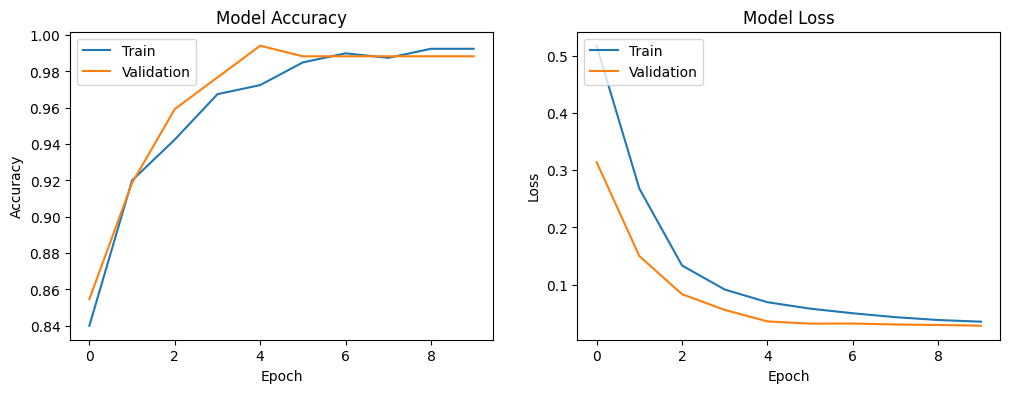

In [43]:
# Plot training & validation accuracy values
# Here we are checking the model accuracy. In this case both the training accuracy and th validation accuracy both increase and...
#...approach 99%, with a very small gap in between the two. This mean the model is generalizing well to the validation data, suggesting
#...the model is not overfitting
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
# Here we are checking the loss of both training and validation data. As we can see, both losses start relatively high and
# ...decrease steadily over time. Both losses remain close to each other suggesting the modelis not overfitting
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

Cross validation

In [44]:
from sklearn.model_selection import StratifiedKFold
# Pringint the confusing matrix of the prediction of the test dat to further confirm the accuracy of the results
from sklearn.metrics import confusion_matrix, classification_report
# Make predictions on the test data
test_predictions_prob = model.predict(X_test)
test_predictions = (test_predictions_prob > 0.5).astype(int)  # Convert probabilities to binary output

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Print the confusion matrix
print(conf_matrix)

# For a more comprehensive classification report including precision, recall, f1-score
print(classification_report(y_test, test_predictions))

4/4 [==============================] - 0s 2ms/step
[[70  1]
 [ 1 42]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [45]:
import numpy as np
# Define the K-fold cross validator
num_folds = 5
kfold = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# K-fold Cross Validation model evaluation
fold_no = 1
acc_per_fold = []
loss_per_fold = []
X_train= np.array(X_train)
y_train= np.array(y_train)

for train, test in kfold.split(X_train, y_train):

  # Define the model architecture
  model = Sequential([
      tf.keras.Input(shape=(30,)),
      Dense(units=15, activation="relu"),
      Dense(units=18, activation="relu"),
      Dense(units=1, activation="linear")
  ])

  # Compile the model
  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits = True),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0075),
                metrics=['accuracy'])

  # Fit data to model
  history = model.fit(X_train[train], y_train[train],
              epochs=100,
              verbose=1)

  # Generate generalization metrics
  scores = model.evaluate(X_train[test], y_train[test], verbose=1)
  acc_per_fold.append(scores[1] * 100)
  loss_per_fold.append(scores[0])

  # Increase fold number
  fold_no = fold_no + 1

# == Provide average scores ==
print(f'Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

Epoch 1/100
15/15 [==============================] - 2s 2ms/step - loss: 0.3648 - accuracy: 0.8490
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.1287 - accuracy: 0.9387
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0810 - accuracy: 0.9694
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.0603 - accuracy: 0.9781
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.0487 - accuracy: 0.9825
Epoch 6/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0367 - accuracy: 0.9869
Epoch 7/100
15/15 [==============================] - 0s 15ms/step - loss: 0.0317 - accuracy: 0.9891
Epoch 8/100
15/15 [==============================] - 0s 8ms/step - loss: 0.0259 - accuracy: 0.9934
Epoch 9/100
15/15 [==============================] - 0s 6ms/step - loss: 0.0235 - accuracy: 0.9978
Epoch 10/100
15/15 [==============================] - 0s 9ms/step - loss: 0.0183 - accuracy: 0.9956
Epoch 11

4/4 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        71
           1       1.00      0.98      0.99        43

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



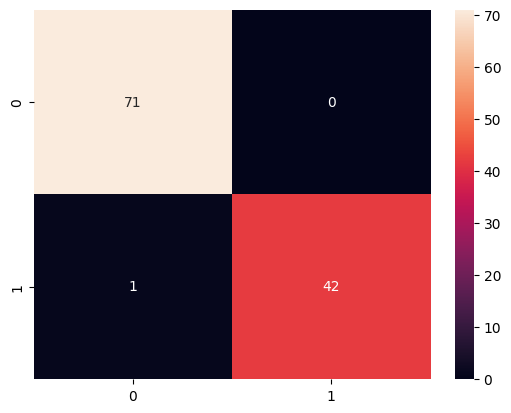

In [49]:
import seaborn as sns
test_predictions_prob = model.predict(X_test)
test_predictions = (test_predictions_prob > 0.5).astype(int)  # Convert probabilities to binary output

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Print the confusion matrix
sns.heatmap(conf_matrix, annot=True)

# For a more comprehensive classification report including precision, recall, f1-score
print(classification_report(y_test, test_predictions))

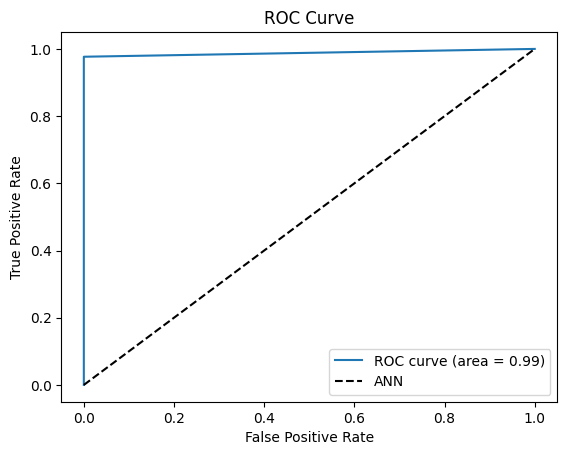

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score 
# Compute the false positive rate (FPR)  
# and true positive rate (TPR) for different classification thresholds 
fpr, tpr, thresholds = roc_curve(y_test, test_predictions, pos_label=1)
# Compute the ROC AUC score 
roc_auc = roc_auc_score(y_test, test_predictions) 
# Plot the ROC curve 
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc) 
# roc curve for tpr = fpr 
plt.plot([0, 1], [0, 1], 'k--', label='ANN') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.legend(loc="lower right") 
plt.show()


In [46]:
import joblib
filename = 'breast_cancer_model.joblib'
joblib.dump(model, open(filename, 'wb'))

In [47]:
# loading the saved model
loaded_model = joblib.load(open('breast_cancer_model.joblib', 'rb'))

In [48]:
#Testing a random prediction
random_values = np.array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])
# Normalize the testing data
norm_random = norm_l(random_values)
predictions = loaded_model.predict(norm_random)
probability = tf.sigmoid(predictions).numpy()
print("predictions =", probability[0][0])
if probability[0][0] < 0.5:
  print("Benign")
else:
  print("Malignant")

1/1 [==============================] - 0s 171ms/step
predictions = 1.0
Malignant
